# ISVR1032 Acoustics I
## Plucked string - modal approach
### Matthew Wright mcmw@isvr.soton.ac.uk

In [1]:
%pylab inline
import matplotlib.animation as animation

Populating the interactive namespace from numpy and matplotlib


## Linearity

In the previous notebook we saw that the string with fixed ends has a series of modes, each with its own associated frequency, and those frequencies are all integer multiples of a **fundamental** frequency; the frequency of the lowest mode.

Because the wave equation and the boundary conditions are linear we can apply the **principle of superposition** to initial condition problems. So if an initial condition $y_0^{(1)}(x)$ produces subsequent motion $y^{(1)}(x,t)$, and another initial condition $y_0^{(2)}(x)$ produces subsequent motion $y^{(2)}(x,t)$, then initial condition $y_0^{(1)}(x) + y_0^{(2)}(x)$ will produce subsequent motion $y^{(1)}(x,t) + y^{(2)}(x,t)$.

This means that any initial condition that can be written as a sum of modes will cause a subsequent motion that is the sum of the subsequent motions of each of those modes. In other words, whenever $y_0(x)$ is a function for which we can write

$$
y_0(x) = \sum_{n=1}^\infty A_n \Phi_n(x),
$$

where

$$
\Phi_n(x) = \sin\left(\frac{n\pi x}{L}\right)
$$

are the modeshapes, then the subsequent motion will be

$$
y(x,t) = \sum_{n=1}^\infty A_n \Phi_n(x) \cos(2\pi n f_1 t)
$$

where $f_1 = c/2L$ is the fundamental frequency. Then the signal obtained from the strings displacement at a particular location $x_s$ will be the sum of a series of sinusoidal tones.

It turns out that one of the initial conditions that we can write as a sum of modes is

$$
y_0(x) = \begin{cases} 
   \displaystyle \frac{ux}{\beta L} , & 0\le x < \beta L \\
   \displaystyle \frac{u(L-x)}{(1-\beta)L}, & \beta L <x \le L,
\end{cases}
$$

where we've used $u$ for the amplitude of the pluck rather than $A$ as before to avoid confusion with $A_n$, the coefficient of $\Phi(x)$ in the  series.

We don't yet know how to calculate the $A_n$ for a given function so you'll have to take it on trust that in this case the answer is

$$
A_n = \frac{2u\sin(\pi\beta n)}{\pi^2(\beta-1)\beta n^2}.
$$

This is an example of a **Fourier Series** and is a very important simplifying concept in acoustical engineering. Often Fourier series will depend on $t$ but this one depends on $x$.

Except of course you don't have to take it on trust that the definition of $A_n$ is correct.

#### Worked example

Demonstrate that 

$$
\sum_{n=1}^\infty A_n \Phi_n(x),
$$

with the above definitions for $A_n$ and $Phi_n$, converges to $y_0$ as defined above.

#### Solution
First the function definitions and the parameters:

In [4]:
def y0(x):
    return (u/L)*((x/beta)*(x >= 0)*(x < beta*L) + 
                  (L - x)/(1 - beta)*(x >= beta*L)*(x <= L))

def Phi(x,n):
    return sin(pi*n*x/L)

def A(n):
    return -2*u*sin(pi*beta*n)/(pi**2*(beta-1)*beta*n**2)

Then we can set the parameters and then use `meshgrid()` to evaluate our functions over an array of values of $x$ and $n$. We can't let $n$ go up to infinity; we'll let it go up to ten instead. 

(0, 0.011000000000000001)

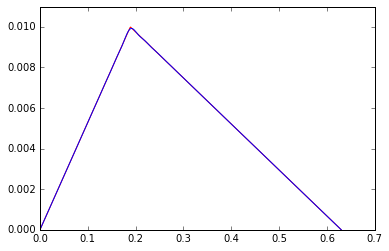

In [13]:
u = 0.01
beta = 0.3
L = 0.63
n_max = 50

n, x = meshgrid(arange(1, n_max + 1), linspace(0, L, 500))
plot(x[:,0], y0(x[:,0]), 'r',
     x[:,0], sum(A(n)*Phi(x, n), axis=1), 'b')
ylim([0, 1.1*u])   # Make sure we can see the top

If you're not sure what `meshgrid()` and `sum()` are doing, go back to the notebook on plotting functions of two variables.

#### Exercises
1. Modify the code so that it takes the first 50 modes.
2. Change the pluck amplitude $u$ and the plucking point $\beta$ to make sure both lines change.
3. Plot the series (but not $y_0$) over a wider range of $x$ to show that the series is periodic (tip: comment out the `ylim()` call).

## Subsequent motion

As we said above, the subsequent motion is given by

$$
y(x,t) = \sum_{n=1}^\infty A_n \Phi_n(x) \cos(2\pi n f_1 t)
$$

where $f_1 = c/2L$, so we can animate the string motion by evaluating this expression. First of all we'll calculate $f_1$, choosing the wave speed to be 200 m/s.

In [14]:
c = 200
L = 0.63
f1 = c/(2*L)
print(f1)

158.73015873015873


Then we'll change to external graphics windows.

In [15]:
%matplotlib

Using matplotlib backend: Qt4Agg


If you've changed any of the definitions of `A()` or `Phi()` change them back as they'll be called when we animate. We'll also reset the rest of the parameters which might have changed. 

In [21]:
u = 0.01
beta = 0.3
n_max = 100

n, x = meshgrid(arange(1, n_max + 1), linspace(0, L, 500))

movie = []                             
fig, ax = subplots()
for t in linspace(0, 1/f1, 100):           
    frame = ax.plot(x[:,0], 
                    sum(A(n)*Phi(x, n)*cos(2*pi*n*f1*t), axis=1), 'b')
    movie.append(frame)                 

ani = animation.ArtistAnimation(fig, movie, interval=50, blit=True)     
fig.show() 

This works, but it's not very efficient because `A()`, `Phi()` and `cos()` are all evaluated with arrays of $500\times 20$ values at every timestep. We can make it easier on the computer by taking advantage of the separability and computing $A_n\Phi_n(x)$ outside the loop.

In [24]:
u = 0.01
beta = 0.05
n_max = 50

n, x = meshgrid(arange(1, n_max + 1), linspace(0, L, 500))
A_n_Phi_n = A(n)*Phi(x, n)

movie = []                             
fig, ax = subplots()
for t in linspace(0, 1/f1, 100):           
    frame = ax.plot(x[:,0], 
                    sum(A_n_Phi_n*cos(2*pi*n*f1*t), axis=1), 'b')
    movie.append(frame)                 

ani = animation.ArtistAnimation(fig, movie, interval=50, blit=True)     
fig.show() 

## Signals

So far this representation has given us an alternative way of animating the motion of a plucked string, but we could already do that with the d'Alembert solution - why do we need another?

To answer that question lets evaluate the force signal at the bridge. We plotted that before but didn't write an expression for it. The force is given by $\tau\partial y/\partial x$ at $x=0$. In our modal form of the solution the gradient is just

$$
\frac{\partial y}{\partial x}(x,t) = \sum_{n=1}^\infty A_n \Phi'_n(x) \cos(2\pi n f_1 t)
$$

where 

$$
\Phi'_n(x) = -\frac{n\pi}{L}\cos\left(\frac{n\pi x}{L}\right)
$$

so

$$
\frac{\partial y}{\partial x}(0,t) = \sum_{n=1}^\infty -\frac{n\pi A_n}{L}  \cos(2\pi n f_1 t) 
$$

because $\Phi'_n(0) = 1$.

We can plot this to make sure it agrees with the previous version:

In [25]:
%matplotlib inline

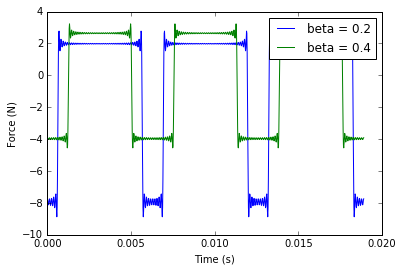

In [26]:
tau = 100                     # Tension in Newtons
n_max = 50

n, t = meshgrid(arange(1, n_max + 1), linspace(0, 3/f1, 1000))
beta = 0.2
plot(t[:,0], -tau*sum((n*pi/L)*A(n)*cos(2*pi*n*f1*t), axis=1))
beta = 0.4
plot(t[:,0], -tau*sum((n*pi/L)*A(n)*cos(2*pi*n*f1*t), axis=1))
xlabel('Time (s)')
ylabel('Force (N)')
legend(('beta = 0.2', 'beta = 0.4'))

The overshoot and ringing at the discontinuities is called the Gibbs phenomenon - you'll learn about it when you study Fourier series.

The form of this expression shows that it is the sum of a series of sinusoids which we can recognise as the harmonic components of the note. We can plot the relative amplitude of each harmonic as follows:

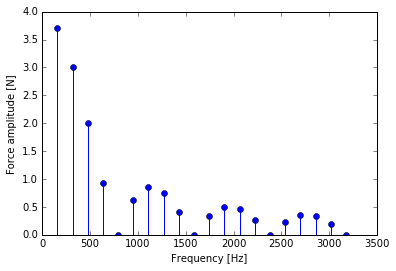

In [31]:
u= 0.01
beta = 0.2

n = arange(1, 21)
stem(n*f1, abs(-tau*(n*pi/L)*A(n)))
xlabel('Frequency [Hz]')
ylabel('Force amplitude [N]')

As this graph shows, the amplitude of the fifth, tenth, fifteenth etc. harmonic is zero. We used `stem()` rather that `plot()` because the harmonics are discrete, so joining the points with lines wouldn't be meaningful. We plotted the absolute value of the amplitude because it's the magnitude that determines how loud it is. 

#### Exercises
1. Adjust `u` and `beta` to see how the graph varies with them. 
2. Examine the form of $A_n$ to find the conditions under which $A_n = 0$.
3. Modify the code to plot the amplitude magnitudes in decibels.

## Summary

[Edit this cell to summarise the important points from this notebook]